In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

### Смотрим характеристики датасета

In [2]:
cancer = datasets.load_breast_cancer()
cancer.keys()
print(cancer.DESCR[:760])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline appr


### Смотрим значения характеристик датасета

In [3]:
cancer_df = pd.DataFrame(cancer.data)
cancer_df.columns = cancer.feature_names
cancer_df.head()### Смотрим характеристики датасета

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Смотрим график распределения классов

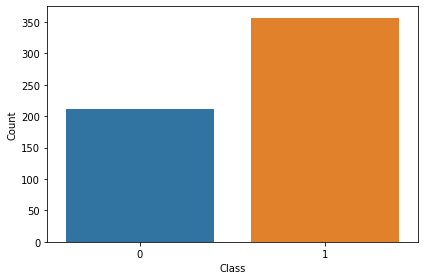

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(cancer.target)

plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()

### Создаём модель и обучаем её

In [5]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
model = logistic_regression.fit(cancer.data, cancer.target)

### Смотрим веса обученной модели

In [6]:
print(model.coef_)

[[ 0.95299424  0.45231581  0.26452051 -0.01311868 -0.03563696 -0.16751801
  -0.23452789 -0.09881326 -0.04934527 -0.00985391  0.04145992  0.37730325
   0.15012598 -0.11206988 -0.00322209 -0.03596899 -0.05011645 -0.01286029
  -0.01191183 -0.00334381  1.01347422 -0.51362219 -0.23245    -0.0163595
  -0.06460782 -0.52206241 -0.64975095 -0.19003716 -0.15631029 -0.05021683]]


### Прогнозируем пренадлежность для первых 10и объектов

In [7]:
prediction = model.predict(cancer.data)
print(prediction[:10])### Смотрим веса обученной модели

[0 0 0 1 0 0 0 0 0 0]


### Смотрим вероятности пренадлежности для первых 10и объектов

In [8]:
prediction = model.predict_proba(cancer.data)
# print(prediction[:10])### Прогнозируем пренадлежность для первых 10и объектов
print([round(pred[1], 3) for pred in prediction[:10]])

[0.0, 0.0, 0.0, 0.842, 0.0, 0.24, 0.0, 0.023, 0.281, 0.013]


### Смотрем характеристику модели

In [9]:
print('Accuracy: {}'.format(model.score(cancer.data, cancer.target)))

Accuracy: 0.9490333919156415
